In [1]:
import pandas as pd
import pyarrow as pa
import os
import seaborn as sns
from matplotlib import pyplot as plt

project_dir = 'data/'

df = pd.read_csv(os.path.join(project_dir, 'main.csv'))
df.shape

(28530, 21)

# Valence (Horizontal)

/tmp/ipykernel_66386/3974498850.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.pointplot(
/tmp/ipykernel_66386/3974498850.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.pointplot(
/tmp/ipykernel_66386/3974498850.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.pointplot(
/tmp/ipykernel_66386/3974498850.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.pointplot(


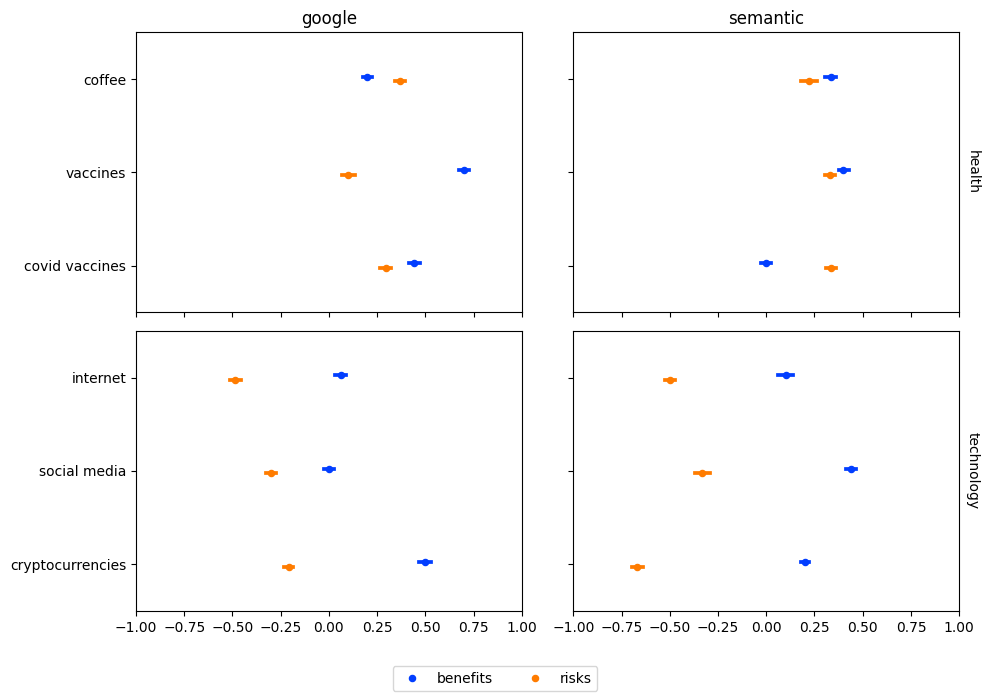

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# order of the y-axis labels
health_order=['coffee', 'vaccines', 'covid vaccines']
tech_order=['internet', 'social media', 'cryptocurrencies']

# create a figure with 2x2 subplot layout
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))

fig.subplots_adjust(bottom=0.2) 

# two loops to group by engine, and then group by query_type
for i, (engine, df_engine) in enumerate(df.groupby('engine')):
    for j, (query_type, df_query_type) in enumerate(df_engine.groupby('query_type')):
        # create a seaborn pointplot with the df_query_type dataframe
        g = sns.pointplot(
            x='valence', 
            y='topic', 
            hue='trt',
            hue_order=['benefits', 'risks'], 
            order = health_order if query_type == 'health' else tech_order,
            join=False,
            markers='.',
            palette = 'bright', 
            data=df_query_type, 
            dodge=True,
            errorbar=('ci', 95),         
            ax=axs[j,i]
        )

        # Remove the legend
        g.legend_.remove()

        # Set the x-axis limits
        g.set_xlim(-1, 1)

        # Remove the x-axis title label
        g.set_xlabel('')

        if j == 0:
            # Set title label
            g.set_title(engine)

            # Remove the x-labels
            g.set_xticklabels([])


        if i == 0:

            # Remove the y-axis title label
            g.set_ylabel('')
            

        else:    
            # Remove the y-labels
            g.set_yticklabels([])

        
            # Set the y-axis title label
            g.set_ylabel(query_type, rotation=-90, labelpad=15)
        

            g.yaxis.set_label_position("right")
            # g.yaxis.tick_right()
        


# Adjust the spacing between subplots
fig.tight_layout()

# Create a general legend
handles, labels = g.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

# create space for the legend
fig.subplots_adjust(bottom=0.12) 
                
